# Visualization

The `viz` module provides a collection of plotting helpers built on matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matviz.viz import (
    plot_range, plot_range_idx, plot_cdf, cplot, cscatter, ctext,
    polar_grid, plot_diag, plot_zero, plot_axes, subplotter, subplotter_auto,
    nicefy, logfit, streamgraph, jitter, interp_plot, linspecer, brighten,
    bar_centered, errorb, suplabel, format_axis_date, calc_plot_ROC, plot_ROC,
    title
)

## plot_range / plot_range_idx

Shade vertical regions on a plot.

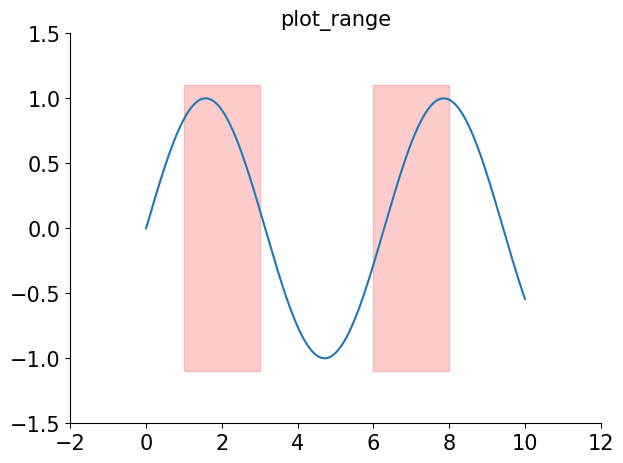

In [2]:
t = np.linspace(0, 10, 500)
y = np.sin(t)
plt.plot(t, y)
plot_range([[1, 3], [6, 8]], color='red', alpha=0.2)
title('plot_range')
nicefy()
plt.show()

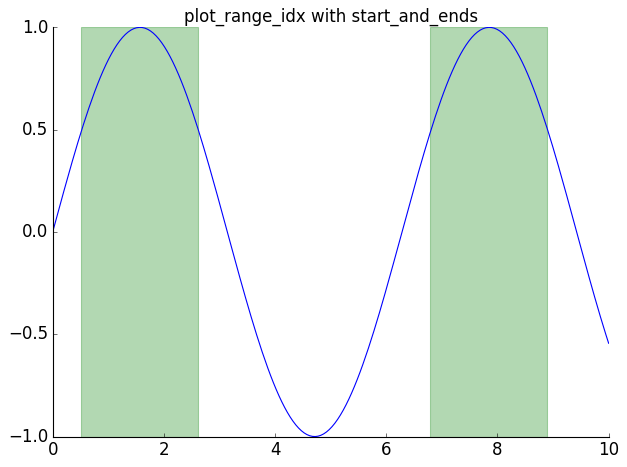

In [3]:
from matviz.etl import start_and_ends

t = np.linspace(0, 10, 200)
y = np.sin(t)
plt.plot(t, y)
events = start_and_ends(y > 0.5)
plot_range_idx(t, events, color='green', alpha=0.3)
title('plot_range_idx with start_and_ends')
nicefy()
plt.show()

## plot_cdf

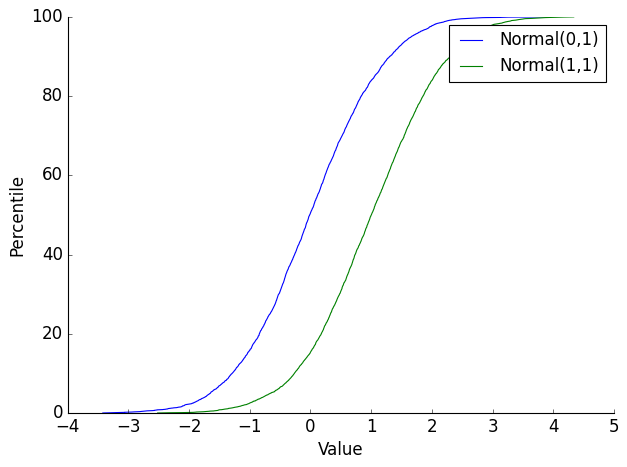

In [4]:
data1 = np.random.randn(5000)
data2 = np.random.randn(5000) + 1
plot_cdf(data1, label='Normal(0,1)')
plot_cdf(data2, label='Normal(1,1)')
plt.xlabel('Value')
plt.ylabel('Percentile')
plt.legend()
nicefy()
plt.show()

## Complex number plotting: cplot, cscatter, ctext, polar_grid

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


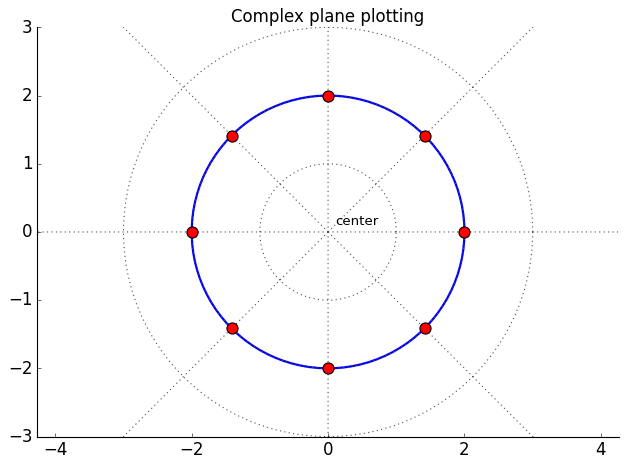

In [5]:
z = np.exp(1j * np.linspace(0, 2*np.pi, 100))
cplot(z * 2, 'b-', lw=2)

points = 2 * np.exp(1j * np.linspace(0, 2*np.pi, 8, endpoint=False))
cscatter(points, s=100, c='red', zorder=5)

ctext(0.1 + 0.1j, 'center', fontsize=12)

polar_grid(nrings=3, nrays=8)
title('Complex plane plotting')
nicefy()
plt.show()

## Reference lines: plot_diag, plot_zero, plot_axes

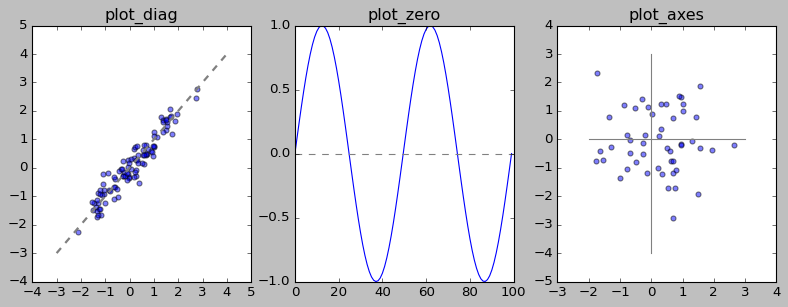

In [6]:
x = np.random.randn(100)
y = x + np.random.randn(100) * 0.3

plt.figure(figsize=(12, 4))

subplotter(1, 3, 0)
plt.scatter(x, y, alpha=0.5)
plot_diag(lw=2)
title('plot_diag')

subplotter(1, 3, 1)
plt.plot(np.sin(np.linspace(0, 4*np.pi, 100)))
plot_zero()
title('plot_zero')

subplotter(1, 3, 2)
plt.scatter(np.random.randn(50), np.random.randn(50), alpha=0.5)
plot_axes()
title('plot_axes')

plt.show()

## subplotter / subplotter_auto

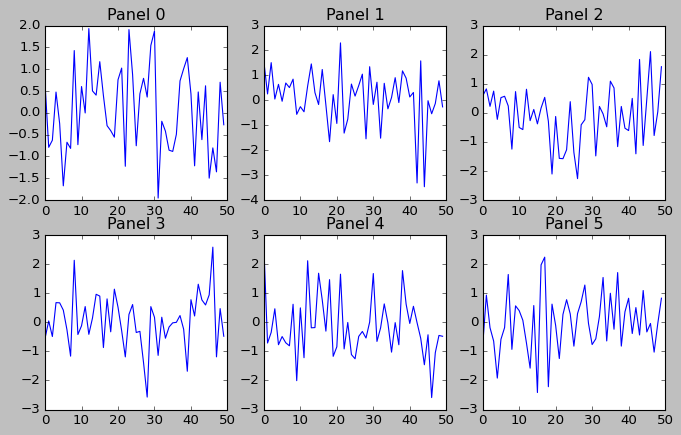

In [7]:
plt.figure(figsize=(10, 6))
for i in range(6):
    subplotter_auto(6, i)
    plt.plot(np.random.randn(50))
    title(f'Panel {i}')
plt.show()

## nicefy — before and after

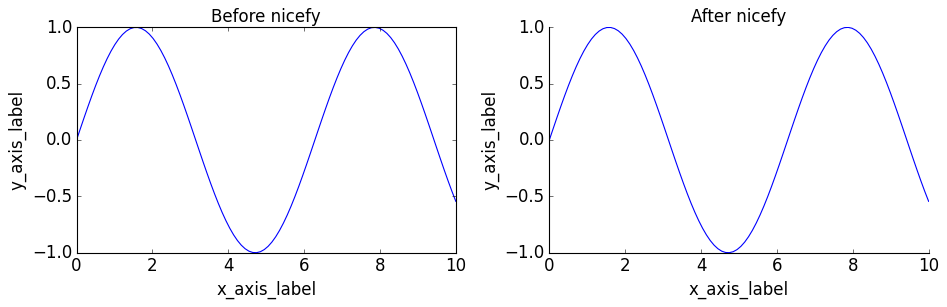

In [8]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(12, 4))

subplotter(1, 2, 0)
plt.plot(x, y)
plt.xlabel('x_axis_label')
plt.ylabel('y_axis_label')
title('Before nicefy')

subplotter(1, 2, 1)
plt.plot(x, y)
plt.xlabel('x_axis_label')
plt.ylabel('y_axis_label')
title('After nicefy')
nicefy()

plt.show()

## logfit

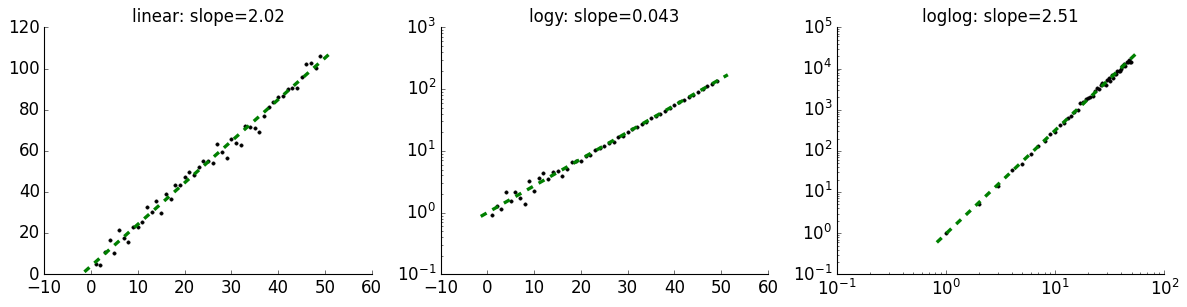

In [9]:
x = np.arange(1, 50)

plt.figure(figsize=(15, 4))

subplotter(1, 3, 0)
slope, intercept = logfit(x, 2*x + 5 + np.random.randn(len(x))*3)
title(f'linear: slope={slope:.2f}')
nicefy()

subplotter(1, 3, 1)
slope, intercept = logfit(x, np.exp(0.1*x) + np.random.randn(len(x))*0.5, graph_type='logy')
title(f'logy: slope={slope:.3f}')
nicefy()

subplotter(1, 3, 2)
slope, intercept = logfit(x, x**2.5 * (1 + np.random.randn(len(x))*0.1), graph_type='loglog')
title(f'loglog: slope={slope:.2f}')
nicefy()

plt.show()

## interp_plot

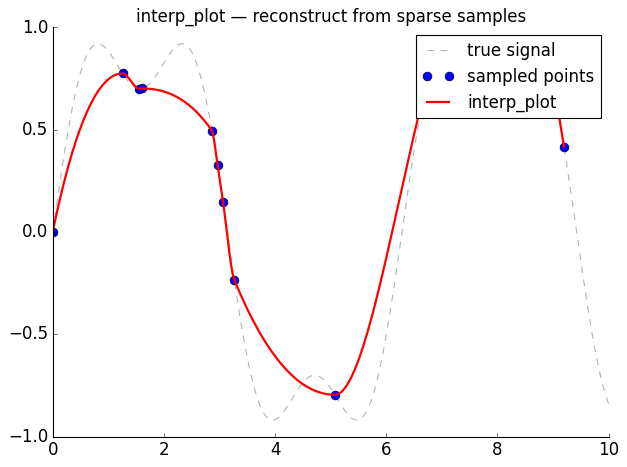

In [10]:
# Simulate a signal with missing data
x = np.linspace(0, 10, 200)
y_true = np.sin(x) + 0.3 * np.sin(3 * x)

# Keep only sparse, irregularly sampled points
keep = np.sort(np.random.choice(len(x), 15, replace=False))
x_sparse = x[keep]
y_sparse = y_true[keep]

plt.plot(x, y_true, 'k--', alpha=0.3, label='true signal')
plt.plot(x_sparse, y_sparse, 'o', markersize=8, label='sampled points')
interp_plot(x_sparse, y_sparse, 'r-', lw=2, label='interp_plot')
plt.legend()
title('interp_plot — reconstruct from sparse samples')
nicefy()
plt.show()

## linspecer and brighten

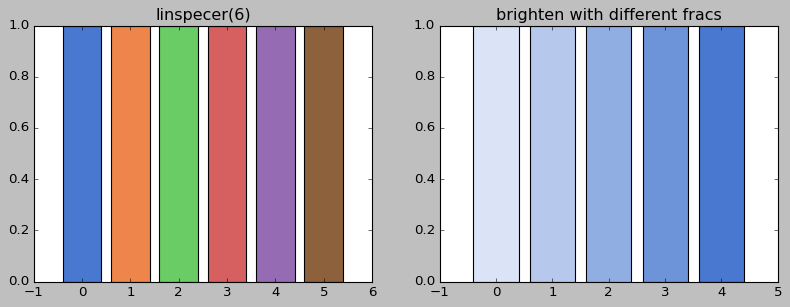

In [11]:
colors = linspecer(6)
plt.figure(figsize=(12, 4))

subplotter(1, 2, 0)
for i, c in enumerate(colors):
    plt.bar(i, 1, color=c)
title('linspecer(6)')

subplotter(1, 2, 1)
base = colors[0]
fracs = [0.2, 0.4, 0.6, 0.8, 1.0]
for i, f in enumerate(fracs):
    plt.bar(i, 1, color=brighten(base, f))
title('brighten with different fracs')

plt.show()

## bar_centered and errorb

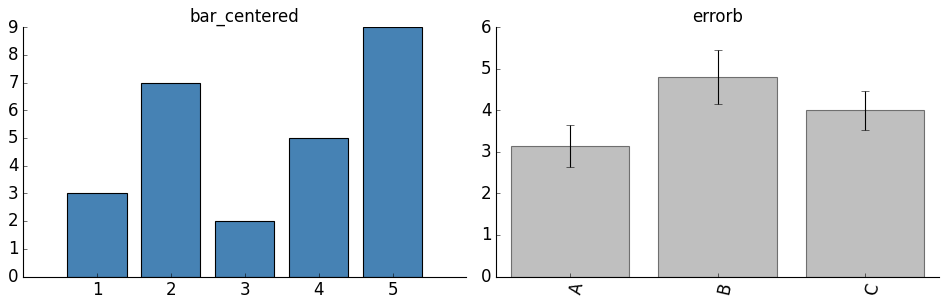

In [12]:
plt.figure(figsize=(12, 4))

subplotter(1, 2, 0)
bar_centered([3, 7, 2, 5, 9], color='steelblue')
title('bar_centered')
nicefy()

subplotter(1, 2, 1)
data = pd.Series({
    'A': np.random.randn(50) + 3,
    'B': np.random.randn(50) + 5,
    'C': np.random.randn(50) + 4,
})
errorb(data)
title('errorb')
nicefy()

plt.show()

## ROC curves

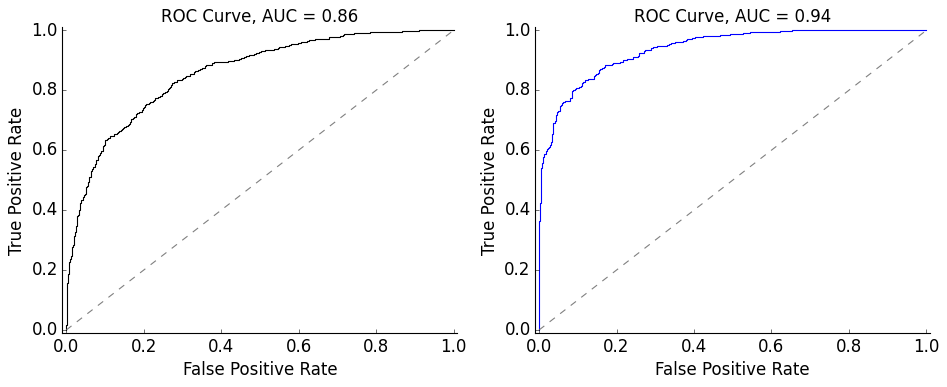

In [13]:
plt.figure(figsize=(12, 5))

# From two distributions
subplotter(1, 2, 0)
y1 = np.random.randn(1000)
y2 = np.random.randn(1000) + 1.5
auc_val = calc_plot_ROC(y1, y2)

# From labels and scores
subplotter(1, 2, 1)
y_true = np.array([0]*500 + [1]*500)
y_score = np.concatenate([np.random.randn(500), np.random.randn(500) + 2])
auc_val = plot_ROC(y_true, y_score, c='blue')

plt.show()

## suplabel and format_axis_date

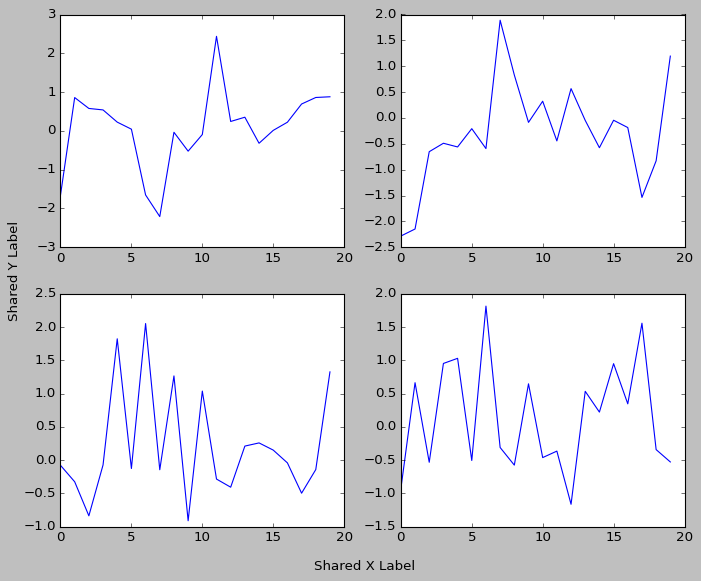

In [14]:
plt.figure(figsize=(10, 8))
for i in range(4):
    subplotter(2, 2, i)
    plt.plot(np.random.randn(20))
suplabel('x', 'Shared X Label')
suplabel('y', 'Shared Y Label')
plt.subplots_adjust(left=0.12, bottom=0.1)
plt.show()

## CubeRootScale

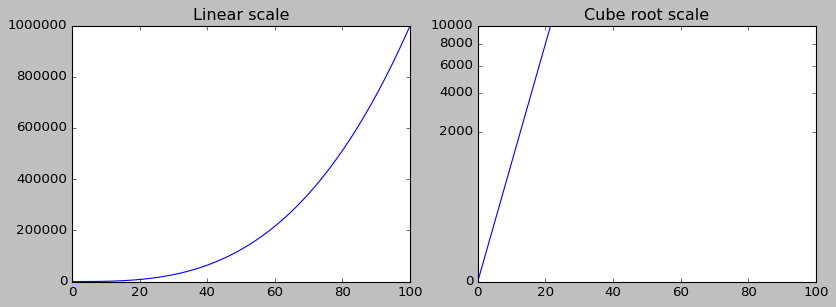

In [15]:
from matviz import cbrt_scale

x = np.linspace(0, 100, 200)
y = x ** 3

plt.figure(figsize=(12, 4))

subplotter(1, 2, 0)
plt.plot(x, y)
title('Linear scale')

subplotter(1, 2, 1)
plt.plot(x, y)
plt.gca().set_yscale('cuberoot')
title('Cube root scale')

plt.show()